# Projekt z Inżynierii Uczenia Maszynowego
Semestr letni 2020, WEiTI PW
## Autorzy
Przemysław Stawczyk

Maciej Szulik

## Zadanie

### Treść
*Wygląda na to, że nasze firmy kurierskie czasami nie radzą sobie z dostawami. Lepiej by było, gdybyśmy wiedzieli, ile taka dostawa dla danego zamówienia może potrwać.*

### Definicja zadania biznesowego
Tu definicja

#### Biznesowe kryterium sukcesu
Tu kryterium

### Definicja zadania modelowania
Tu definicja

#### Analityczne kryterium sukcesu
Tu kryterium

## Analiza danych

In [1]:
import datetime
import json # as pandas struggled with json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

### Load files:

In [2]:
def load_file(filename):
    with open(filename, encoding="utf8") as f:
        data = f.readlines()
        data = [json.loads(line) for line in data] #convert string to dict format
        df = pd.json_normalize(data)
    return df

users = load_file(r'data/users.jsonl')# pd.read_json(r"data/users.jsonl", typ='series', lines=True, dtype='dict')
users.head(30)

,user_id,name,city,street
0,102,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03
1,103,Kajetan Karmelita,Warszawa,ulica Maczka 31
2,104,Eryk Kuncewicz,Police,ulica Krakowska 14/94
3,105,Sylwia Sabak,Radom,ulica Szpitalna 71
4,106,Inga Stępka,Mielec,aleja Liliowa 50
5,107,Filip Włodyka,Gdynia,aleja Ludowa 797
6,108,Jerzy Podgórny,Warszawa,ul. Głogowa 78
7,109,Julita Żuberek,Kutno,ul. Wesoła 214
8,110,Urszula Lepianka,Konin,al. Rataja 60
9,111,Mateusz Posmyk,Kutno,ulica Jadwigi 92


In [3]:
deliveries = load_file("data/deliveries.jsonl")
deliveries.head(30)

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2020-02-10T02:11:41,2020-02-12T13:11:41,360.0
1,20002,2020-03-18T08:22:20,None,360.0
2,20003,2020-01-21T18:07:56,2020-01-24T05:07:56,360.0
3,20004,2020-02-21T15:33:36,2020-02-24T02:33:36,NaN
4,20005,2020-03-09T14:46:19,2020-03-13T19:46:19,620.0
5,20006,2020-02-02T02:07:04,2020-02-06T07:07:04,620.0
6,20007,2020-01-20T20:33:10,2020-01-25T01:33:10,620.0
7,20008,2020-02-02T20:41:01,2020-02-05T07:41:01,360.0
8,20009,2020-01-31T02:24:21,2020-02-04T07:24:21,620.0
9,20010,2020-01-17T04:30:21,2020-01-19T15:30:21,360.0


In [4]:
sessions = load_file("data/sessions.jsonl")
sessions.head(30)

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2020-02-10T01:49:08,102.0,1081.0,VIEW_PRODUCT,0,NaN
1,100001,2020-02-10T01:52:15,102.0,NaN,VIEW_PRODUCT,0,NaN
2,100001,2020-02-10T01:56:33,102.0,1080.0,VIEW_PRODUCT,0,NaN
3,100001,2020-02-10T01:58:07,102.0,1079.0,VIEW_PRODUCT,0,NaN
4,100001,2020-02-10T02:01:33,102.0,1077.0,VIEW_PRODUCT,0,NaN
5,100001,2020-02-10T02:03:54,102.0,1003.0,VIEW_PRODUCT,0,NaN
6,100001,2020-02-10T02:04:56,102.0,1002.0,VIEW_PRODUCT,0,NaN
7,100001,2020-02-10T02:07:25,102.0,1078.0,VIEW_PRODUCT,0,NaN
8,100001,2020-02-10T02:11:41,102.0,1078.0,BUY_PRODUCT,0,20001.0
9,100002,2020-03-18T08:22:14,102.0,1318.0,VIEW_PRODUCT,0,NaN


In [5]:
products = load_file("data/products.jsonl")
products.head()

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,5.897000e+01
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2.048500e+03
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7.639000e+09
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,4.999000e+01
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,4.999000e+01


### Analiza dostarczonych plików

##### Users

In [6]:
total_rows = users.shape[0]
null_values = users.isnull().sum(axis = 0)

print("Total rows: ", total_rows)
print("Null values per culumn:")
print(null_values)


Total rows:  200
Null values per culumn:
user_id    0
name       0
city       0
street     0
dtype: int64


Dane `users` przechowują informacje o id użytkownika, imieniu i nazwisku i adresie. Nie posiadają żadnych brakujących wartości.


#### Products

In [7]:
total_rows =  products.shape[0]
null_values = products.isnull().sum(axis = 0)
negative_prices_count = products[products["price"] < 0].shape[0]

print("Total rows: ", total_rows)

print("Null values per culumn:")
print(null_values)

print("Negative prices: ", negative_prices_count)


Total rows:  319
Null values per culumn:
product_id       0
product_name     0
category_path    0
price            0
dtype: int64
Negative prices:  15


Dane `products` przechowują informacje o id produktu, jego nazwie, kategorii i cenie. Nie posiadają żadnych brakujących wartości. Występuje 15 przypadków, kiedy cena jest ujemna, co może budzić wątwpliwości, ale dalsza analiza tych danych w naszym przypadku nie jest konieczna, gdyż nie niosą one potrzebnych nam informacji.

##### Deliveries

In [8]:
total_rows =  deliveries.shape[0]
null_values = deliveries.isnull().sum(axis = 0)

print("Total rows: ", total_rows)

print("Null values per culumn:")
print(null_values)

Total rows:  7268
Null values per culumn:
purchase_id             0
purchase_timestamp      0
delivery_timestamp    382
delivery_company      362
dtype: int64


Dane `deliveries` przechowują informacje o id zakupu (powiązane z `purchase_id` w `sessions`), czasie złożenia zamowienia, czasie dostawy i firmie kurierskiej, która realizowała przesyłkę. Są to dla nas dane szczególnie istotne. Uwagę zwracają brakujące czasy dostawy (`delivery_timestamp`) dla 382 rekordów i brak identyfikatora firmy kurierskiej (`delivery_company`) dla 362, co może być dla nas problemem.

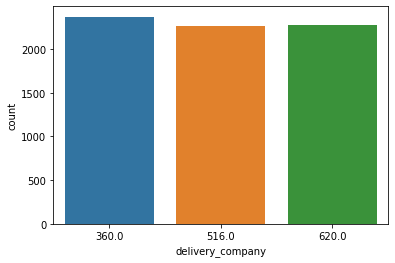

In [9]:
deliveries["delivery_company"].value_counts()
sn.countplot(x="delivery_company", data=deliveries)

Przesyłki obsługują 3 firmy kurierskie, realizując zbliżoną liczbę zamówień.

In [10]:
deliveries[deliveries["purchase_timestamp"] > deliveries["delivery_timestamp"]].shape[0]

0

Nie występują anomalie, kiedy zamówienie wystąpiło później niż czas dostawy.

#### Sessions

In [11]:
total_rows =  sessions.shape[0]
null_values = sessions.isnull().sum(axis = 0)

print("Total rows: ", total_rows)

print("Null values per culumn:")
print(null_values)

Total rows:  39746
Null values per culumn:
session_id              0
timestamp               0
user_id              1953
product_id           1999
event_type              0
offered_discount        0
purchase_id         32478
dtype: int64


Dane `sessions` przechowują informacje o zarejestrowanych zdarzeniach związanych z produktami, a dokładniej są to: id sesji, czas jej utworzenia, id użytkownika powiązane z sesją, id produktu, proponowana promocja na produkt, typ zdarzenia (produkt kupiony, produkt zobaczony).

Te dane są dla nas kluczowe, ponieważ pozwalają powiązać dostawę (poprzez wartość `purchase_id`) z użytkownikiem (poprzez wartość `user_id`), a co za tym idzie z adresem.

Należy zatem sprawdzić, czy takie złączenie jest zawsze możliwe.

In [12]:
sessions[(sessions["event_type"] == "BUY_PRODUCT") & (sessions["purchase_id"].isnull())]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id


Zdarzenie `BUY_PRODUCT` mapuje się na konkretne id zakupu, nie ma tu anomalii.

In [13]:
sessions[(sessions["event_type"] == "BUY_PRODUCT") & (sessions["user_id"].isnull())]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
31,100007,2020-02-02T02:07:04,NaN,1045.0,BUY_PRODUCT,20,20006.0
200,100049,2020-02-15T05:32:03,NaN,1073.0,BUY_PRODUCT,15,20031.0
245,100058,2020-01-19T12:29:31,NaN,NaN,BUY_PRODUCT,10,20036.0
305,100072,2020-01-30T17:21:59,NaN,1285.0,BUY_PRODUCT,10,20046.0
546,100142,2020-02-09T14:07:22,NaN,1010.0,BUY_PRODUCT,20,20100.0
...,...,...,...,...,...,...,...
39305,110305,2020-02-24T12:21:34,NaN,1001.0,BUY_PRODUCT,10,27179.0
39475,110347,2020-03-22T02:15:39,NaN,1033.0,BUY_PRODUCT,0,27210.0
39501,110354,2020-01-03T14:44:32,NaN,1034.0,BUY_PRODUCT,10,27215.0
39642,110407,2020-03-03T10:11:25,NaN,1287.0,BUY_PRODUCT,20,27251.0


Jak widać nie wszystkie sesje zakończone zakupem posiadają id użytkownika, co mogłoby być przydatne do ustalenia adresu dostawy.

Taki brak da się jednak uzupełnić, jeśli dla danej sesji istnieje inna akcja, w której id użytkownika jest znane.

**Przykład:**

```json
{"session_id": 100007, "timestamp": "2020-02-02T02:03:15", "user_id": 102, "product_id": 1045, "event_type": "VIEW_PRODUCT", "offered_discount": 20, "purchase_id": null}


{"session_id": 100007, "timestamp": "2020-02-02T02:07:04", "user_id": null, "product_id": 1045, "event_type": "BUY_PRODUCT", "offered_discount": 20, "purchase_id": 20006}
```

Chociaż dla zakupu o id `20006` nie jest zdefiniowane `user_id`, to z całej sesji o id `100007` możemy to wywnioskować i uzupełnić brak ustawiając `user_id` na `102`.


Jeśli to możliwe, należy takie dane uzupełnić.

In [14]:
session_user_map=sessions[sessions["user_id"].notna()].set_index('session_id')['user_id'].to_dict()

for i, row in sessions.iterrows():
    if np.isnan(row["user_id"]) and row["session_id"] in session_user_map:
            sessions.at[i,'user_id'] = session_user_map[row["session_id"]]

In [15]:
sessions[(sessions["event_type"] == "BUY_PRODUCT") & (sessions["user_id"].isnull())]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
8879,102309,2020-03-27T04:44:07,NaN,1276.0,BUY_PRODUCT,0,21614.0
22095,105756,2020-03-18T20:05:45,NaN,1001.0,BUY_PRODUCT,0,24017.0
27323,107180,2020-01-05T17:38:20,NaN,1283.0,BUY_PRODUCT,0,25007.0


Dzięki takiej operacji, liczba wierszy z brakiem `user_id` zmniejszyła się z 354 do 3.

Połączmy dane w jedną tabelę.

In [16]:
# inner join sessins and deliveries
merged_data = pd.merge(left=sessions, right=deliveries, left_on='purchase_id', right_on='purchase_id')

# left join users
merged_data = pd.merge(left=merged_data, right=users, how='left', left_on='user_id', right_on='user_id')

# left join products
merged_data = pd.merge(left=merged_data, right=products, how='left', left_on='product_id', right_on='product_id')

merged_data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,name,city,street,product_name,category_path,price
0,100001,2020-02-10T02:11:41,102.0,1078.0,BUY_PRODUCT,0,20001.0,2020-02-10T02:11:41,2020-02-12T13:11:41,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Kyocera FS-3540MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,5.126000e+03
1,100002,2020-03-18T08:22:20,102.0,1318.0,BUY_PRODUCT,0,20002.0,2020-03-18T08:22:20,None,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,5.530000e+02
2,100003,2020-01-21T18:07:56,102.0,1046.0,BUY_PRODUCT,10,20003.0,2020-01-21T18:07:56,2020-01-24T05:07:56,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,LEGO Batman 2 DC Super Heroes (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,6.118000e+01
3,100005,2020-02-21T15:33:36,102.0,1001.0,BUY_PRODUCT,15,20004.0,2020-02-21T15:33:36,2020-02-24T02:33:36,NaN,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,5.897000e+01
4,100006,2020-03-09T14:46:19,102.0,1201.0,BUY_PRODUCT,0,20005.0,2020-03-09T14:46:19,2020-03-13T19:46:19,620.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Jabra Speak 410,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,3.274700e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,110434,2020-02-28T13:13:00,301.0,1077.0,BUY_PRODUCT,0,27264.0,2020-02-28T13:13:00,2020-03-04T15:13:00,620.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Kyocera FS-C2026MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,3.777000e+03
7264,110436,2020-02-16T21:22:58,301.0,1037.0,BUY_PRODUCT,10,27265.0,2020-02-16T21:22:58,2020-02-20T10:22:58,360.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,7.990000e+08
7265,110437,2020-02-24T11:35:37,301.0,1012.0,BUY_PRODUCT,15,27266.0,2020-02-24T11:35:37,2020-02-29T13:35:37,620.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Fallout New Vegas (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,6.900000e+01
7266,110439,2020-01-31T23:34:46,301.0,1007.0,BUY_PRODUCT,10,27267.0,2020-01-31T23:34:46,2020-02-04T12:34:46,360.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Dead Space 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,8.999000e+01


### Odrzućmy część kolumn

In [17]:
columns = ['session_id', 'purchase_id', 'event_type', 'offered_discount', 'timestamp', 'product_id', 'product_name']
for col in columns:
    merged_data = merged_data.drop(col, axis=1)

merged_data

,user_id,purchase_timestamp,delivery_timestamp,delivery_company,name,city,street,category_path,price
0,102.0,2020-02-10T02:11:41,2020-02-12T13:11:41,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Komputery;Drukarki i skanery;Biurowe urządzeni...,5.126000e+03
1,102.0,2020-03-18T08:22:20,None,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Sprzęt RTV;Audio;Słuchawki,5.530000e+02
2,102.0,2020-01-21T18:07:56,2020-01-24T05:07:56,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Gry i konsole;Gry na konsole;Gry PlayStation3,6.118000e+01
3,102.0,2020-02-21T15:33:36,2020-02-24T02:33:36,NaN,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Telefony i akcesoria;Telefony stacjonarne,5.897000e+01
4,102.0,2020-03-09T14:46:19,2020-03-13T19:46:19,620.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,3.274700e+02
...,...,...,...,...,...,...,...,...,...
7263,301.0,2020-02-28T13:13:00,2020-03-04T15:13:00,620.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Komputery;Drukarki i skanery;Biurowe urządzeni...,3.777000e+03
7264,301.0,2020-02-16T21:22:58,2020-02-20T10:22:58,360.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Komputery;Monitory;Monitory LCD,7.990000e+08
7265,301.0,2020-02-24T11:35:37,2020-02-29T13:35:37,620.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Gry i konsole;Gry na konsole;Gry Xbox 360,6.900000e+01
7266,301.0,2020-01-31T23:34:46,2020-02-04T12:34:46,360.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Gry i konsole;Gry na konsole;Gry Xbox 360,8.999000e+01


### Kolumny wyliczane.
Przydatne mogą okazać się podstawowe kategorie i sam czas dostawy

In [18]:
merged_data['delivery_timestamp'] = pd.to_datetime(merged_data.delivery_timestamp)
merged_data['purchase_timestamp'] = pd.to_datetime(merged_data.purchase_timestamp)
merged_data['delivery_total_time'] = merged_data['delivery_timestamp'] - merged_data['purchase_timestamp']

print(merged_data['delivery_total_time'])

0      2 days 11:00:00
1                  NaT
2      2 days 11:00:00
3      2 days 11:00:00
4      4 days 05:00:00
             ...      
7263   5 days 02:00:00
7264   3 days 13:00:00
7265   5 days 02:00:00
7266   3 days 13:00:00
7267   3 days 17:00:00
Name: delivery_total_time, Length: 7268, dtype: timedelta64[ns]


/home/mac/.local/lib/python3.8/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/mac/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


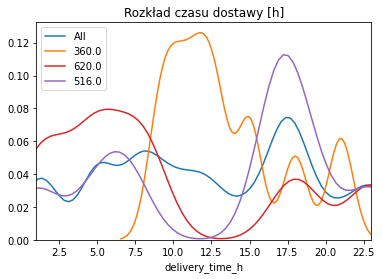

In [19]:
merged_data["delivery_time_h"] = merged_data['delivery_total_time'].dt.seconds / 3600
max_h = merged_data["delivery_time_h"].max()
min_h = merged_data["delivery_time_h"].min()

plt.title("Rozkład czasu dostawy [h]")

sn.distplot(merged_data["delivery_time_h"], hist=False, label="All").set(xlim=(min_h, max_h))

for company in merged_data["delivery_company"].unique():
    sn.distplot(merged_data[merged_data["delivery_company"] == company]["delivery_time_h"],hist=False, label=str(company)).set(xlim=(min_h, max_h))

In [20]:
category_path_arr = merged_data['category_path'].str.split(';', 2)
category_arr = []
subcategory_arr = []
for path in category_path_arr:
    if type(path) == float:
        category_arr.append(path)
        subcategory_arr.append(path)
    else:
        category_arr.append(path[0])
        subcategory_arr.append(path[1])

merged_data['category'] = category_arr
merged_data['subcategory'] = subcategory_arr

merged_data

,user_id,purchase_timestamp,delivery_timestamp,delivery_company,name,city,street,category_path,price,delivery_total_time,delivery_time_h,category,subcategory
0,102.0,2020-02-10 02:11:41,2020-02-12 13:11:41,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Komputery;Drukarki i skanery;Biurowe urządzeni...,5.126000e+03,2 days 11:00:00,11.0,Komputery,Drukarki i skanery
1,102.0,2020-03-18 08:22:20,NaT,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Sprzęt RTV;Audio;Słuchawki,5.530000e+02,NaT,NaN,Sprzęt RTV,Audio
2,102.0,2020-01-21 18:07:56,2020-01-24 05:07:56,360.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Gry i konsole;Gry na konsole;Gry PlayStation3,6.118000e+01,2 days 11:00:00,11.0,Gry i konsole,Gry na konsole
3,102.0,2020-02-21 15:33:36,2020-02-24 02:33:36,NaN,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Telefony i akcesoria;Telefony stacjonarne,5.897000e+01,2 days 11:00:00,11.0,Telefony i akcesoria,Telefony stacjonarne
4,102.0,2020-03-09 14:46:19,2020-03-13 19:46:19,620.0,Oliwier Maślankiewicz,Konin,pl. Kwiatowa 03,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,3.274700e+02,4 days 05:00:00,5.0,Telefony i akcesoria,Akcesoria telefoniczne
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,301.0,2020-02-28 13:13:00,2020-03-04 15:13:00,620.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Komputery;Drukarki i skanery;Biurowe urządzeni...,3.777000e+03,5 days 02:00:00,2.0,Komputery,Drukarki i skanery
7264,301.0,2020-02-16 21:22:58,2020-02-20 10:22:58,360.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Komputery;Monitory;Monitory LCD,7.990000e+08,3 days 13:00:00,13.0,Komputery,Monitory
7265,301.0,2020-02-24 11:35:37,2020-02-29 13:35:37,620.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Gry i konsole;Gry na konsole;Gry Xbox 360,6.900000e+01,5 days 02:00:00,2.0,Gry i konsole,Gry na konsole
7266,301.0,2020-01-31 23:34:46,2020-02-04 12:34:46,360.0,Ada Laszkiewicz,Szczecin,ul. Sportowa 70,Gry i konsole;Gry na konsole;Gry Xbox 360,8.999000e+01,3 days 13:00:00,13.0,Gry i konsole,Gry na konsole


### simple base model experiment

In [21]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

clean_data = merged_data

columns = ['user_id', 'street', 'purchase_timestamp', 'delivery_timestamp', 'name', 'category_path']
for col in columns:
    clean_data = clean_data.drop(col, axis=1)

clean_data =  clean_data.dropna(axis=0, how='any')

target = clean_data['delivery_total_time'].dt.total_seconds()/3600
data = clean_data.drop('delivery_total_time', axis=1)

# code labels
le_cat = preprocessing.LabelEncoder()
le_cat.fit(np.unique(np.array(data['category'])))
data['category'] = le_cat.transform(data['category'])

le_subcat = preprocessing.LabelEncoder()
le_subcat.fit(np.unique(np.array(data['subcategory'])))
data['subcategory'] = le_subcat.transform(data['subcategory'])

le_city = preprocessing.LabelEncoder()
le_city.fit(np.unique(np.array(data['city'])))
data['city'] = le_city.transform(data['city'])

In [22]:
def train_tree_reg(data, target, depth=2, k_fold_ratio=3, rand=3228):
    k_fold = KFold(n_splits=k_fold_ratio, random_state=rand, shuffle=True)
    data_arr = np.array(data)
    target_arr = np.array(target)

    k_model = DecisionTreeRegressor(max_depth=depth)

    max_errors = []
    mean_absolute_errors = []
    mean_squared_errors = []

    for train_index, test_index in k_fold.split(data_arr):
        train_X, valid_X = data_arr[train_index], data_arr[test_index]
        train_y, valid_y = target_arr[train_index], target_arr[test_index]

        k_model = k_model.fit(train_X, train_y)

        k_predict = k_model.predict(valid_X)

        # code for calculating metrics
        max_errors.append(max_error(valid_y, k_predict))
        mean_absolute_errors.append(mean_absolute_error(valid_y, k_predict))
        mean_squared_errors.append(mean_squared_error(valid_y, k_predict))

    return np.max(max_errors), np.average(mean_absolute_errors), np.average(mean_squared_errors)

In [23]:
#x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

for i in range(1,7):
    print('depth = ', i)
    err, avg, avg_sqr = train_tree_reg(data, target, i)
    print('\tmax error = ', err,'\n\tavg error = ', avg, '\n\tavg square error = ', avg_sqr)

depth =  1
	max error =  28.766606170598905 
	avg error =  12.165638180902619 
	avg square error =  236.93787959802674
depth =  2
	max error =  24.153558052434462 
	avg error =  9.781824598107727 
	avg square error =  154.43031325518237
depth =  3
	max error =  27.818137730358877 
	avg error =  6.498372430375144 
	avg square error =  94.835940730009
depth =  4
	max error =  23.84996358339403 
	avg error =  5.752716809240376 
	avg square error =  70.67976115105554
depth =  5
	max error =  19.43996333638863 
	avg error =  3.4649596107829956 
	avg square error =  34.455550605351114
depth =  6
	max error =  8.431372549019613 
	avg error =  1.2744867725220879 
	avg square error =  7.716653226863326
